In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

### Задание 1: исправьте код применения оператора Собеля, который мы писали на занятии, таким образом, чтобы оператор применялся по обоим направлениям (x и y).

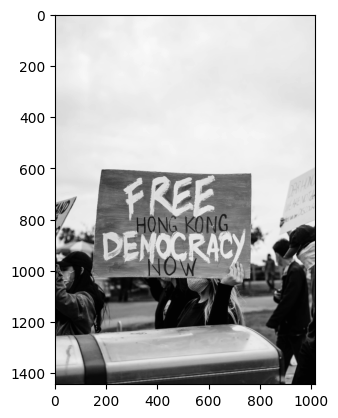

In [5]:
img = cv.imread("hong.png", 0)
plt.imshow(img, cmap="gray")

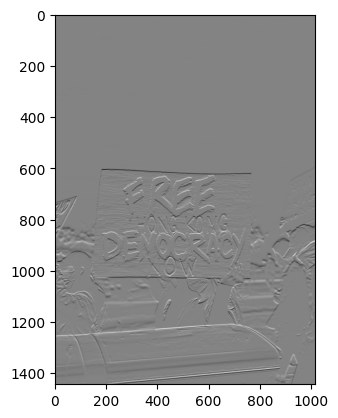

In [6]:
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)
plt.imshow(sobely, cmap="gray")

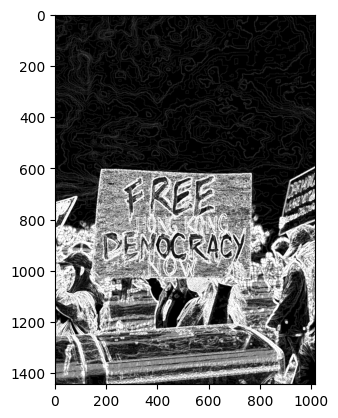

In [7]:
abs_sobel_x = cv.convertScaleAbs(sobelx)
abs_sobel_y = cv.convertScaleAbs(sobely)
grad = cv.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)
plt.imshow(grad, cmap="gray")

### Задание 2:
### На занятии мы попробовали несколько фильтров различного назначения (это размытие, устранение шумов, выделение границ и тд). Каждый алгоритм, осуществляющий фильтрацию изображения, обычно имеет несколько параметров, влияющих на результат (размер ядра и тд). И для того, чтобы понять, какое именно влияние оказывают каждый из параметров или их комбинация, может потребоваться перезапустить код много раз с разными значениями параметров, что не удобно.
### Поэтому в этом задании вам предлагается создать оконное приложение, отображающее результат применения того или иного фильтра (можете выбрать любой, например, Canny), интерфейс (кнопки, чек-боксы, ползунки и тд), позволяющий варьировать значения параметров фильтра и смотреть, как это влияет на результат в реальном времени (обновляя выводимое изображение).
#### Пример реализации такого интерфейса на OpenCV можно найти здесь: https://docs.opencv.org/4.x/d9/dc8/tutorial_py_trackbar.html

In [ ]:
def nothing(x):
    pass
# Create a black image, a window
cv.namedWindow('ImageWindow')
# create trackbars for color change
cv.createTrackbar('Gx','ImageWindow',0,500,nothing)
cv.createTrackbar('Gy','ImageWindow',0,500,nothing)
# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'ImageWindow',0,1,nothing)
while(1):
    cv.imshow('ImageWindow',img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    gx = cv.getTrackbarPos('Gx','ImageWindow')
    gy = cv.getTrackbarPos('Gy','ImageWindow')
    s = cv.getTrackbarPos(switch,'ImageWindow')
    if s == 0:
        img = cv.imread("hw/hong.png", 0)
    else:
        img = cv.imread("hw/hong.png", 0)
        img = cv.Canny(img,gx,gy)
cv.destroyAllWindows()

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/highgui/src/window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


## Задание 3:
### К изображению hong.png из папки необходимо подобрать такую морфологическую операцию, чтобы устранить с таблички слова, написанные черным цветом

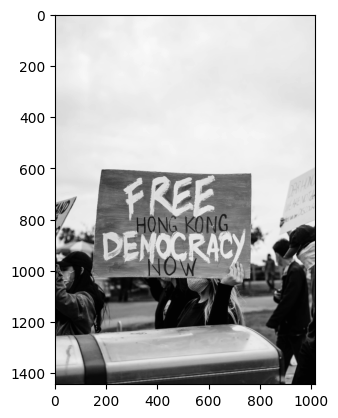

In [8]:
img = cv.imread("hong.png", 0)
plt.imshow(img, cmap="gray")

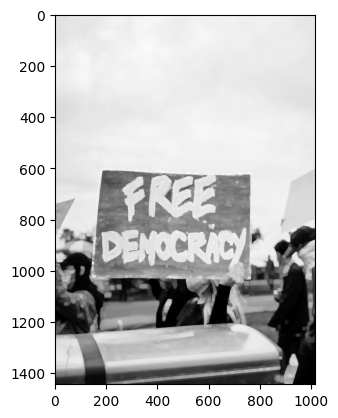

In [9]:
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(img,kernel,iterations = 2)
plt.imshow(dilation, cmap="gray")